In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

Имея только данные и названия колонок, можно создать Датафрейм с помощью метода zip<br>
На выходе получится список с кортежами

In [26]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

baby_dataset = list(zip(names, births))
baby_dataset

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

Результат baby_dataset будет использоваться для аргумента data при создании Датафрейма

In [27]:
df = pd.DataFrame(data=baby_dataset,columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Сохранение Датафрейма в csv. index и header - сохранении с индексами и колонками в csv

In [28]:
df.to_csv('births1.csv', index=False, header=False)

Считывание csv в Датафрейм. Аргумент names - колонки

In [29]:
df = pd.read_csv('births1.csv', names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Сортировка по возрастанию по указаной колонке (ascending - по убыванию). 

In [30]:
sorted = df.sort_values('Births', ascending=False)
sorted

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


In [31]:
sorted.head(1)

,Names,Births
4,Mel,973


In [32]:
df.iloc[df['Births'].argmax()]


Names     Mel
Births    973
Name: 4, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   5 non-null      object
 1   Births  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [34]:
max_value = df['Births'].max()
max_value

973

In [35]:
df.Births.mean()

550.2

Визуализация

График в виде линии - linear

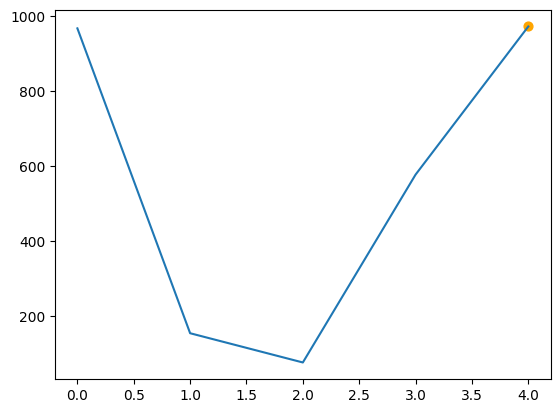

In [36]:
df['Births'].plot()

#Отметка точки максимума на графике
max_value = df['Births'].max()
max_index = df.sort_values('Births', ascending=False).head(1).index[0]

plt.scatter(max_index, max_value, color='orange', s=40, marker='o')

Достать имя строки с максимальным значением:

In [37]:
df[df['Births'] == df['Births'].max()].iloc[0].values[0]

'Mel'

Сделать список с 1000 строками из списка names :

In [38]:
names = ['Bob','Jessica','Mary','John','Mel']
np.random.seed(341)
random_names = [names[np.random.randint(0, len(names))] for i in range(1000)]
#первые 10 строк из списка
random_names[:10]

['John', 'John', 'Mary', 'Mary', 'Mel', 'Mel', 'Bob', 'Mel', 'John', 'Bob']

Сделать список с 1000 строками из списка births

In [39]:
np.random.seed(341)
random_births = [np.random.randint(0, 1000) for i in range(1000)]
random_births[0:10]

[627, 869, 803, 279, 2, 538, 388, 324, 437, 704]

Полученные через random списки склеиваем при помощи функции zip в форму массив-кортежи и далее в Датафрейм:

In [40]:
eq = list(zip(random_names, random_births))
df = pd.DataFrame(eq, columns=['Names', 'Births'])
df


,Names,Births
0,John,627
1,John,869
2,Mary,803
3,Mary,279
4,Mel,2
...,...,...
995,Bob,772
996,Mel,552
997,Mary,901
998,Bob,605


Сохраняем полученный Датафрейм в csv

In [41]:
df.to_csv('births1000.csv', index=False, header=False)

Считываем этот файл

In [42]:
df = pd.read_csv('births1000.csv', names=['Names', 'Births'])
df

,Names,Births
0,John,627
1,John,869
2,Mary,803
3,Mary,279
4,Mel,2
...,...,...
995,Bob,772
996,Mel,552
997,Mary,901
998,Bob,605


Найти уникальные имена по колонке Names:

In [43]:
df['Names'].unique()

array(['John', 'Mary', 'Mel', 'Bob', 'Jessica'], dtype=object)

In [44]:
df.Names.value_counts()

Names
Bob        218
Mel        216
Mary       202
John       197
Jessica    167
Name: count, dtype: int64

Найти по каждому имени суммарное количество по колонке Births

In [45]:
df = df.groupby(df['Names']).sum()
df

,Births
Names,
Bob,105863
Jessica,80725
John,97091
Mary,101044
Mel,92886


Сортировка по суммарному количеству рождений по убыванию

In [46]:
df.sort_values('Births', ascending=False)

,Births
Names,
Bob,105863
Mary,101044
John,97091
Mel,92886
Jessica,80725


In [47]:
df.head(1)

,Births
Names,
Bob,105863


Визуализация по рождениям

<Axes: xlabel='Names'>

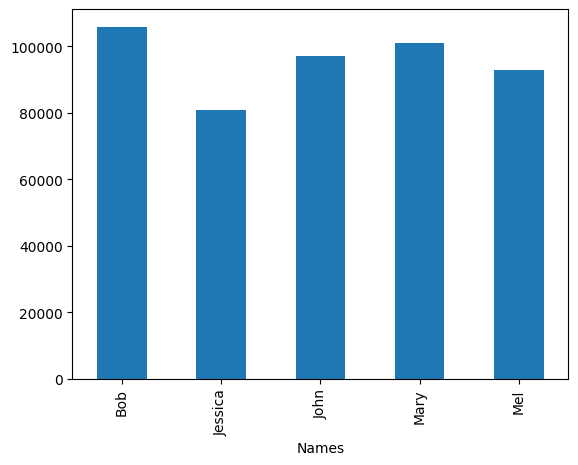

In [51]:
df['Births'].plot(kind='bar')

Откуда брать данные?